In [14]:
import pandas as pd
import pyarrow.parquet as pq
import os
import airportsdata 
from geopy.distance import geodesic

In [15]:
airports = airportsdata.load()

dataset = pq.ParquetDataset('c:\\Users\\lukas\\OneDrive - Imperial College London\\0_Sustainable Transport\\2021_COP26',
                            ) # filters=[('columnName', 'in', filterList)]
df = dataset.read(use_threads=True).to_pandas()

In [204]:
delegates_path = os.getcwd() + '\\origin_airports_delegates.csv'
data_delegates = pd.read_csv(delegates_path)

iata_icao_path = os.getcwd() + '\\iata-icao.csv'
data_iata_icao = pd.read_csv(iata_icao_path)

In [205]:
airport_location = data_delegates.merge(data_iata_icao, on='iata', how='left')[['iata','icao','total_delegates','country_code','airport','latitude','longitude']]
airport_location


,iata,icao,total_delegates,country_code,airport,latitude,longitude
0,AUH,OMAA,4409,AE,Abu Dhabi International Airport,24.43300,54.65110
1,GRU,SBGR,3081,BR,Sao Paulo/Guarulhos International Airport,23.42620,46.48000
2,PEK,ZBAA,1411,CN,Beijing Capital International Airport,40.07250,116.59800
3,LOS,DNMM,1411,NG,Murtala Muhammed International Airport,6.57737,3.32116
4,CGK,WIII,1229,ID,Soekarno–Hatta International Airport,-6.12556,106.65600
...,...,...,...,...,...,...,...
202,ZRH,LSZH,8,CH,Zurich Airport,47.46470,8.54917
203,KIV,LUKK,8,MD,Chisinau International Airport,46.92770,28.93100
204,ASM,HHAS,7,ER,Asmara International Airport,15.29190,38.91070
205,MGA,MNMG,6,NI,Augusto C. Sandino International Airport,12.14150,-86.16820


In [206]:
# Check for NAN values 
# airport_location.isna()
# airport_location = airport_location.dropna()#isna().sum()#.any(axis=1).count
# airport_location[airport_location.isna().any(axis=1)]
airport_location["country_code"][77] =  "NA"

In [239]:
dubai_airport = pd.DataFrame({'latitude_A': [airports.get('OMDB')['lat']],
                     'longitude_A': [airports.get('OMDB')['lon']]})

delegate_airports = airport_location[['latitude','longitude']]

# Function to calculate distance using geopy.distance
def calculate_distance(row):
    coord_A = (dubai_airport['latitude_A'].iloc[0], dubai_airport['longitude_A'].iloc[0])
    coord_B = (row['latitude'], row['longitude'])
    return geodesic(coord_A, coord_B).kilometers

airport_location['distance_to_dubai'] = delegate_airports.apply(calculate_distance,axis=1)

airport_location

,iata,icao,total_delegates,country_code,airport,latitude,longitude,distance_to_dubai
0,AUH,OMAA,4409,AE,Abu Dhabi International Airport,24.43300,54.65110,115.950398
1,GRU,SBGR,3081,BR,Sao Paulo/Guarulhos International Airport,23.42620,46.48000,923.827135
2,PEK,ZBAA,1411,CN,Beijing Capital International Airport,40.07250,116.59800,5856.254969
3,LOS,DNMM,1411,NG,Murtala Muhammed International Airport,6.57737,3.32116,5899.623220
4,CGK,WIII,1229,ID,Soekarno–Hatta International Airport,-6.12556,106.65600,6543.695620
...,...,...,...,...,...,...,...,...
202,ZRH,LSZH,8,CH,Zurich Airport,47.46470,8.54917,4773.283197
203,KIV,LUKK,8,MD,Chisinau International Airport,46.92770,28.93100,3352.541593
204,ASM,HHAS,7,ER,Asmara International Airport,15.29190,38.91070,2039.020269
205,MGA,MNMG,6,NI,Augusto C. Sandino International Airport,12.14150,-86.16820,14143.820362


In [240]:
airport_location[airport_location['distance_to_dubai'] >= 10000]

,iata,icao,total_delegates,country_code,airport,latitude,longitude,distance_to_dubai
10,JFK,KJFK,770,US,John F. Kennedy International Airport,40.639700,-73.7789,11021.839311
13,YOW,CYOW,742,CA,Ottawa Macdonald-Cartier International Airport,45.322500,-75.6692,10756.579780
32,SYD,YSSY,404,AU,Sydney Airport (Kingsford Smith Airport),-33.946100,151.1770,12038.861443
37,BOG,SKBO,378,CO,El Dorado International Airport,4.701590,-74.1469,13645.133727
45,SCL,SCEL,301,CL,Comodoro Arturo Merino Benitez International A...,-33.393000,-70.7858,14776.568263
46,SCL,SCEL,301,CL,Arturo Merino Benítez International Airport,-33.392800,-70.7856,14776.547899
80,LIM,SPIM,195,PE,Jorge Chavez International Airport,-12.021900,-77.1143,14836.731110
90,AEP,SABE,179,AR,Aeroparque Internacional Jorge Newbery,-34.558900,-58.4164,13659.050933
105,TGU,MHTG,139,HN,Toncontin International Airport,14.060900,-87.2172,14069.337152
106,TGU,MHTG,139,HN,Toncontín International Airport,14.061700,-87.2169,14069.250271


In [241]:
print(airport_location[airport_location['distance_to_dubai'] >= 10000]['distance_to_dubai'].count(),"flights with over 10,000 km")

54 flights with over 10,000 km


In [242]:
print("Total km flown to COP28:",round(sum(airport_location['distance_to_dubai']),0))
print("Total Delegates:          ",sum(airport_location.total_delegates))

Total km flown to COP28: 1390089.0
Total Delegates:           53654


# Calculating CO2 emissions with take-off and landing (non-transit)

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import pycountry

In [244]:
def country_code_to_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except AttributeError:
        return None

plot_data = airport_location[:][:40]
plot_data['country_name'] = plot_data['country_code'].apply(country_code_to_name)

In [245]:
plot_data.loc[0,"country_name"] = 'UAE'
plot_data.loc[12,"country_name"] = 'Tanzania'
plot_data.loc[17,"country_name"] = 'Korea'
plot_data.loc[20,"country_name"] = 'Congo'
plot_data.loc[21,"country_name"] = 'Russia'

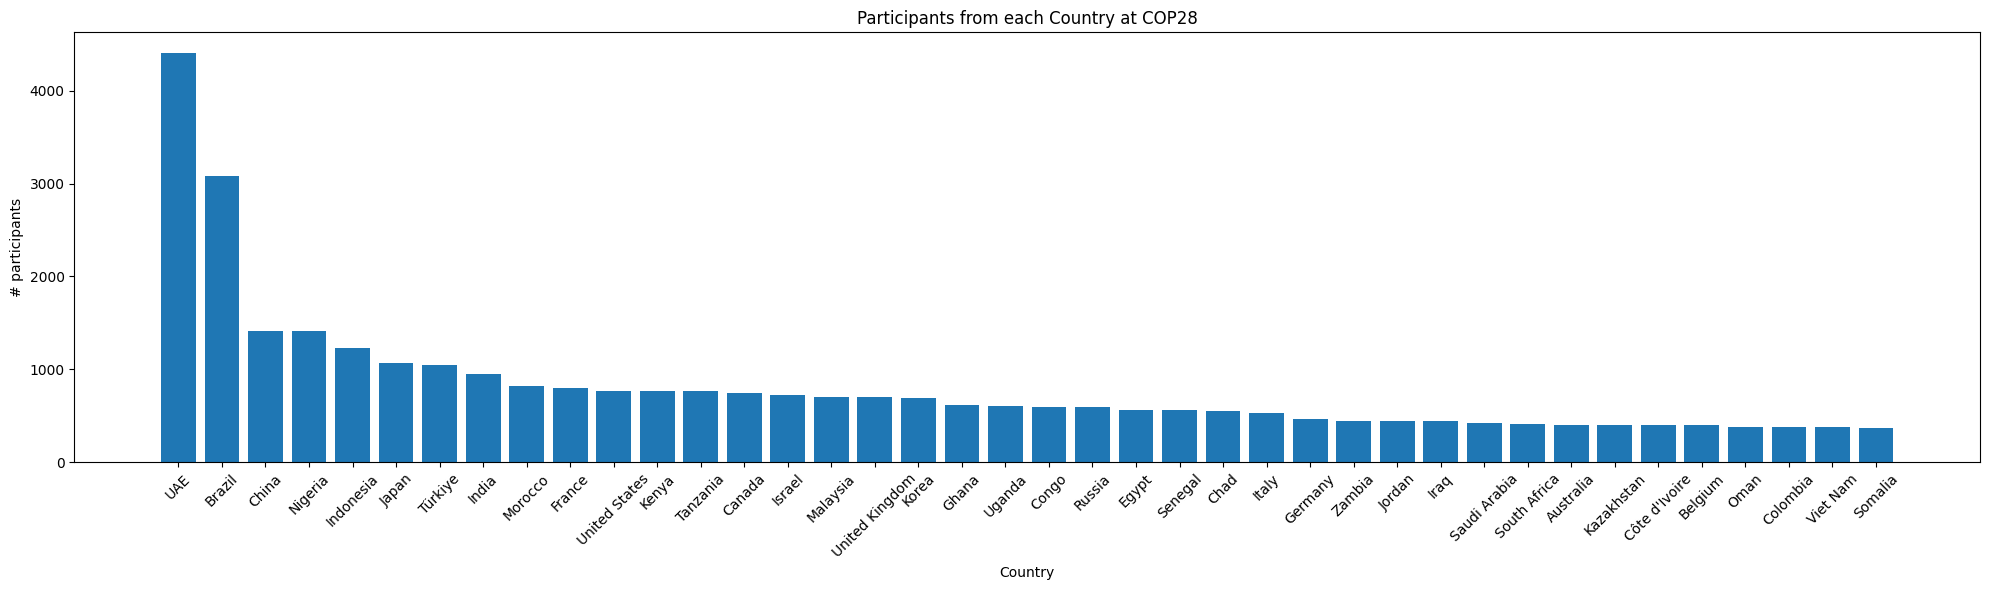

In [246]:

# Plot the data
plt.figure(figsize=(20, 6))  # Set the figure size
plt.bar(plot_data['country_name'], plot_data.total_delegates)  # Plot a bar chart
plt.title('Participants from each Country at COP28')  # Set the title
plt.xlabel('Country')  # Set the x-axis label
plt.ylabel('# participants')  # Set the y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('participants_country.pdf')
plt.show()  # Show the plot

### Checking if flight from origin to destination is in flight database

In [316]:
destination_dubai = df[df['destination_airport'] == 'OMDB']
# destination_dubai[destination_dubai['origin_airport'] == 'DNMM'] #[['origin_airport_name','destination_airport_name']]
# destination_dubai['origin_airport'] = destination_dubai['origin_airport'].astype('str')#.dtypes
# destination_dubai['origin_airport'].unique()


,callsign,icao_address,flight_number,tail_number,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_airport,...,so2_kg,sulphates_kg,nvpm_data_source,nvpm_mass_kg,nvpm_number,nvpm_ei_n_mean,sdr_mean,night_flight,night_segments,pct_night_dist
1574949,VPBJM,4001A7,,VP-BJM,CL60,Jet,DNMM,Murtala Muhammed International Airport,NG,OMDB,...,8.228475,0.167928,ICAO EDB,1.065275,3.334378e+19,4.862691e+15,696.83417,False,True,15.023127


In [313]:
# # Alternative 
# def inner_merge_on_columns(df1, df2, column1, column2):
#     merged_data = []
#     for value1 in df1[column1]:
#         for value2 in df2[column2]:
#             if value1 == value2:
#                 row1 = df1[df1[column1] == value1].iloc[0].to_dict()
#                 row2 = df2[df2[column2] == value2].iloc[0].to_dict()
#                 merged_data.append({**row1, **row2})
#     return pd.DataFrame(merged_data)

# merged_df = inner_merge_on_columns(airport_location,destination_dubai,"icao","origin_airport")
# merged_df['icao'].unique()


# Merging airport origin with the existing flights from 2021
merged_df = airport_location.merge(destination_dubai, left_on='icao', right_on='origin_airport', how='inner')
test = merged_df['icao'].unique()
test.size

88

Select unique flights from origin to destination airport

In [304]:

unique_flights_df = merged_df.drop_duplicates(subset=['icao'])
unique_flights_df.reset_index(inplace=True)

# Relevant columns
unique_flights_df = unique_flights_df[['icao', 'total_delegates', 'country_code', 'origin_airport','destination_airport',
       'distance_to_dubai', 'assumed_load_factor', 'aircraft_type_icao', 'total_fuel_burn','co2_kg', 
       'nox_kg','hc_kg', 'oc_kg', 'h2o_kg', 'so2_kg', 'sulphates_kg'
       ]]
unique_flights_df.to_excel('flights_without_transit.xlsx', index=False)
# unique_flights_df

Index(['index', 'iata', 'icao', 'total_delegates', 'country_code', 'airport',
       'latitude', 'longitude', 'distance_to_dubai', 'existing_flight',
       'callsign', 'icao_address', 'flight_number', 'tail_number',
       'aircraft_type_icao', 'aircraft_engine_type', 'origin_airport',
       'origin_airport_name', 'origin_country', 'destination_airport',
       'destination_airport_name', 'destination_country',
       'scheduled_departure_time_utc', 'scheduled_arrival_time_utc',
       'first_waypoint_time', 'last_waypoint_time', 'duration_hours',
       'total_distance_km', 'great_circle_distance_km',
       'longitude_first_waypoint', 'longitude_last_waypoint', 'longitude_min',
       'longitude_max', 'latitude_first_waypoint', 'latitude_last_waypoint',
       'latitude_min', 'latitude_max', 'altitude_first_waypoint',
       'altitude_last_waypoint', 'altitude_min', 'altitude_max', 'n_wypts',
       'n_terrestrial', 'n_satellites', 'n_interpolate', 'n_extrapolate',
       'n_great_

Flights without direct flight to dubai

In [315]:
# All origins who 
airport_location['existing_flight'] = airport_location['icao'].isin(merged_df['origin_airport'])
airport_location[airport_location['existing_flight'] == False]

,iata,icao,total_delegates,country_code,airport,latitude,longitude,distance_to_dubai,existing_flight
8,RBA,GMME,823,MA,Rabat-Sale Airport,34.05150,-6.75152,6003.076078,False
13,YOW,CYOW,742,CA,Ottawa Macdonald-Cartier International Airport,45.32250,-75.66920,10756.579780,False
20,FIH,FZAA,590,CD,N'djili Airport,-4.38575,15.44460,5418.061564,False
23,DKR,GOOY,560,SN,Leopold Sedar Senghor International Airport,14.73970,-17.49020,7628.024227,False
24,NDJ,FTTJ,554,TD,N'Djamena International Airport,12.13370,15.03400,4474.314079,False
...,...,...,...,...,...,...,...,...,...
200,LEU,LESU,11,ES,La Seu d'Urgell Airport,42.33860,1.40917,5245.481469,False
201,LEU,LESU,11,ES,Andorra-La Seu Airport,42.33860,1.40917,5245.481469,False
203,KIV,LUKK,8,MD,Chisinau International Airport,46.92770,28.93100,3352.541593,False
205,MGA,MNMG,6,NI,Augusto C. Sandino International Airport,12.14150,-86.16820,14143.820362,False


In [287]:
export = airport_location[airport_location['existing_flight'] == False]
export.to_excel('flights_with_transit_stop.xlsx', index=False)

#### Heatmap

In [195]:
import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

basemap = folium.Map()
FastMarkerCluster(airport_location[['latitude', 'longitude']]).add_to(basemap)
HeatMap(airport_location[['latitude', 'longitude','total_delegates']],
        ).add_to(basemap)
basemap

In [196]:
basemap = folium.Map()
FastMarkerCluster(airport_location[['latitude', 'longitude']]).add_to(basemap)
HeatMap(airport_location[['latitude', 'longitude','total_delegates']],
        max_val=max(airport_location['total_delegates'])).add_to(basemap)
basemap

C:\Users\lukas\AppData\Local\Temp\ipykernel_12828\3193186839.py:3: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(airport_location[['latitude', 'longitude','total_delegates']],
